In [52]:
import tweepy
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

## Gather 
- The below code was used by me to gather the twitter data based on the tweet IDs form the twitter archive file in JSON format and was saved in the "tweet_json.txt" file

```python

df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())
failed_tweets = {}
with open('tweet_json.txt', 'w') as file:
    for tweet_id in df_tweets['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
        except tweepy.TweepError as err:
            failed_tweets[tweet_id] = err
        else:
            file.write(json.dumps(tweet))
            file.write("\n")
   
```

In [2]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweet_data = pd.read_json('tweet_json.txt', lines=True)
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

## Assess

In [3]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Visual assessment for df_tweets
- not all denominators are out of 10 (messy data)
- there should be one column for dog "stage" (untidy data)
- tweet ID 666287406224695296 has wrong rating 1/2 instead of 9/10
- not all are ratings
- retweets are included

In [4]:
df_tweet_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Visual Assessment of df_tweet_data 
- there should be one table for tweets and tweet data (untidy data)
- need to remove retweets of the ids from the df_tweet

In [5]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Visual Assessment of df_image_pred
- 849336543269576704 is the image of a dog 

> Now we will be assessing the data programatically 

In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_tweets.tweet_id.nunique()

2356

In [8]:
df_tweets.query('retweeted_status_id != "Nan"').retweeted_status_id.nunique()

181

### Programmatic assessment of df_tweets
- dog status should be of type category
- tweet ID should be of type string 
- timestamp should be of datetime type
- Retweeted Status ID should be string and not in form of exponents 
- retweeted_status_timestamp should be of datetime type
- need to remove the retweets as it is not original data (messy data)
- Replace None names with Nan in "name"

In [9]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [10]:
sum(df_tweet_data.id.duplicated())

0

### Programmatic assessment of df_tweet_data
- drop unnecessary columns (messy data)
- remove retweets 
- 2354 instead of 2356 entries in main tweet data 
- ID should be string and not int

In [11]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
sum(df_image_pred.tweet_id.duplicated())

0

In [13]:
df_image_pred.query('img_num > 4').tweet_id.nunique()

0

In [14]:
df_image_pred.query('not p1_dog and not p2_dog and not p3_dog')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### Programmatic assessment of df_image_pred
- tweet_id should be str type
- Remove retweets

## Clean

### Define
#### dog "stage" should be one column by moving all stages in to one and dropping the other stage columns 

In [15]:
df_tweets_clean = df_tweets.copy()
df_tweet_data_clean = df_tweet_data.copy()
df_image_pred_clean = df_image_pred.copy()
df_tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df_tweets_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### Code

In [17]:
stage = []
for i in range(df_tweets_clean.shape[0]):
    if (df_tweets_clean['doggo'][i] == 'doggo' and df_tweets_clean['floofer'][i] == 'None' and df_tweets_clean['pupper'][i] == 'None' and df_tweets_clean['puppo'][i] == 'None'):
        stage.append('doggo')
    elif (df_tweets_clean['doggo'][i] == 'None' and df_tweets_clean['floofer'][i] == 'floofer' and df_tweets_clean['pupper'][i] == 'None' and df_tweets_clean['puppo'][i] == 'None'):
        stage.append('floofer')
    elif (df_tweets_clean['doggo'][i] == 'None' and df_tweets_clean['floofer'][i] == 'None' and df_tweets_clean['pupper'][i] == 'pupper' and df_tweets_clean['puppo'][i] == 'None'):
        stage.append('pupper')
    elif (df_tweets_clean['doggo'][i] == 'None' and df_tweets_clean['floofer'][i] == 'None' and df_tweets_clean['pupper'][i] == 'None' and df_tweets_clean['puppo'][i] == 'puppo'):
        stage.append('puppo')
    else:
        stage.append('None')
df_tweets_clean['stage'] = stage
df_tweets_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

### Test

In [18]:
df_tweets_clean.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Define
- change stage to category type
- tweet ID should be of type string
- timestamp should be of datetime type
- retweeted_status_timestamp should be of datetime type

### Code

In [19]:
df_tweets_clean['stage'] = df_tweets_clean.stage.astype('category')
df_tweets_clean['tweet_id'] = df_tweets_clean.tweet_id.astype(str)
df_tweets_clean['tweet_id'] = df_tweets_clean.tweet_id.astype(str)
df_tweets_clean['timestamp'] = pd.to_datetime(df_tweets_clean['timestamp'])
df_tweets_clean['retweeted_status_timestamp'] = pd.to_datetime(df_tweets_clean['retweeted_status_timestamp'])

### Test

In [20]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         2356 non-null category
dtypes: category(1), datetime64[ns, UTC](2), float64(4), int64(2), object(5)
memory usage: 241.9+ KB


### Define
- change the rating for tweet ID 666287406224695296 to 9/10 instead of 1/2
- remove all rows with rating_denominator not equal to 10 as they are not ratings 

### Code

In [21]:
dog_index = df_tweets_clean.query('tweet_id == "666287406224695296"').index
df_tweets_clean.at[dog_index, 'rating_numerator'] = 9
df_tweets_clean.at[dog_index, 'rating_denominator'] = 10

In [22]:
df_tweets_clean = df_tweets_clean.query('rating_denominator == 10')

### Test

In [23]:
df_tweets_clean.query('tweet_id == "666287406224695296"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,9,10,an,None


In [24]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2334 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2334 non-null datetime64[ns, UTC]
source                        2334 non-null object
text                          2334 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null datetime64[ns, UTC]
expanded_urls                 2279 non-null object
rating_numerator              2334 non-null int64
rating_denominator            2334 non-null int64
name                          2334 non-null object
stage                         2334 non-null category
dtypes: category(1), datetime64[ns, UTC](2), float64(4), int64(2), object(5)
memory usage: 257.8+ KB


In [25]:
df_tweets_clean.query('rating_denominator != 10').count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
stage                         0
dtype: int64

### Define
- Remove retweets form the data frame by removing the rows where retweeted_status_id is not null

### Code

In [26]:
df_tweets_clean = df_tweets_clean.query('retweeted_status_id == "Nan"')

### Test 

In [27]:
df_tweets_clean.query('retweeted_status_id != "Nan"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


In [28]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2154 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2154 non-null datetime64[ns, UTC]
source                        2154 non-null object
text                          2154 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 2100 non-null object
rating_numerator              2154 non-null int64
rating_denominator            2154 non-null int64
name                          2154 non-null object
stage                         2154 non-null category
dtypes: category(1), datetime64[ns, UTC](2), float64(4), int64(2), object(5)
memory usage: 237.9+ KB


### Define
- Drop the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp as we are not considering retweets

### Code

In [29]:
df_tweets_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [30]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2154 non-null object
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2154 non-null datetime64[ns, UTC]
source                   2154 non-null object
text                     2154 non-null object
expanded_urls            2100 non-null object
rating_numerator         2154 non-null int64
rating_denominator       2154 non-null int64
name                     2154 non-null object
stage                    2154 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 187.4+ KB


### Define 
- Replace None with Nan

### Code

In [31]:
df_tweets_clean['name'] = df_tweets_clean.name.replace('None', np.nan)

### Test

In [32]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Define
- Keep only ID, favorite_count and retweet_count and drop all other columns 

### Code

In [33]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [34]:
df_tweet_data_clean.drop(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'], axis=1, inplace=True)

### Test

In [35]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Define
- Rename ID column to tweet_id and convert to str type

### Code

In [36]:
df_tweet_data_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)
df_tweet_data_clean['tweet_id'] = df_tweet_data_clean.tweet_id.astype(str)

### Test

In [37]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Define
- Remove retweets by merging df_tweets_clean with df_tweet_data_clean which will also make the data tidy

### Code

In [38]:
df_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [39]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2154 non-null object
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2154 non-null datetime64[ns, UTC]
source                   2154 non-null object
text                     2154 non-null object
expanded_urls            2100 non-null object
rating_numerator         2154 non-null int64
rating_denominator       2154 non-null int64
name                     1490 non-null object
stage                    2154 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 187.4+ KB


In [40]:
df_tweets_clean = pd.merge(df_tweets_clean, df_tweet_data_clean, how='left', left_on='tweet_id', right_on='tweet_id', left_index=False, right_index=False)

### Test

In [41]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 13 columns):
tweet_id                 2154 non-null object
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2154 non-null datetime64[ns, UTC]
source                   2154 non-null object
text                     2154 non-null object
expanded_urls            2100 non-null object
rating_numerator         2154 non-null int64
rating_denominator       2154 non-null int64
name                     1490 non-null object
stage                    2154 non-null category
favorite_count           2154 non-null int64
retweet_count            2154 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(4), object(5)
memory usage: 221.1+ KB


### Define
- convert tweet_id to str type

### Code

In [42]:
df_image_pred_clean['tweet_id'] = df_image_pred_clean.tweet_id.astype(str)

### Test

In [43]:
df_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
- Remove all retweets by merging it with df_tweets_clean

### Code

In [44]:
df_tweets_clean = pd.merge(df_tweets_clean, df_image_pred_clean, how='left', left_on='tweet_id', right_on='tweet_id', left_index=False, right_index=False)

### Test

In [45]:
df_tweets_clean.query('img_num == "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
29,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,885518971528720385,NaN,NaN,2017-07-13 15:19:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,884247878851493888,NaN,NaN,2017-07-10 03:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,878604707211726852,NaN,NaN,2017-06-24 13:24:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,876537666061221889,NaN,NaN,2017-06-18 20:30:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,875097192612077568,NaN,NaN,2017-06-14 21:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,https://twitter.com/drboondoc/status/874413398...,13,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 24 columns):
tweet_id                 2154 non-null object
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2154 non-null datetime64[ns, UTC]
source                   2154 non-null object
text                     2154 non-null object
expanded_urls            2100 non-null object
rating_numerator         2154 non-null int64
rating_denominator       2154 non-null int64
name                     1490 non-null object
stage                    2154 non-null category
favorite_count           2154 non-null int64
retweet_count            2154 non-null int64
jpg_url                  1977 non-null object
img_num                  1977 non-null float64
p1                       1977 non-null object
p1_conf                  1977 non-null float64
p1_dog                   1977 non-null object
p2                       1977 non-null object
p2_conf 

> Now we create a Master file with the clean data for future use and save it in the file "twitter_archive_master.csv"

## Storing

In [47]:
df_tweets_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyse

>1. First we are trying to find the tweet with the highest rating 

In [51]:
max_numerator = df_tweets_clean.rating_numerator.idxmax()
df_tweets_clean.iloc[max_numerator]

tweet_id                                                749981277374128128
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-07-04 15:00:45+00:00
source                   <a href="https://about.twitter.com/products/tw...
text                     This is Atticus. He's quite simply America af....
expanded_urls            https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                      1776
rating_denominator                                                      10
name                                                               Atticus
stage                                                                 None
favorite_count                                                        5569
retweet_count                                                         2772
jpg_url                  

> Atticus is the dog with the highest rating of 1776 even though he's not the most favorite nor the most retweeted dog 

>2. Here we are trying to find the range of the ratings provided in our tweets

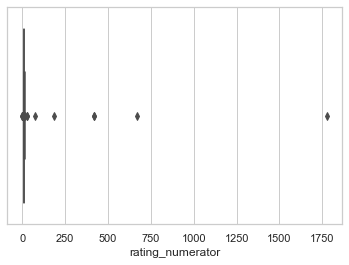

In [53]:
sns.boxplot(x=df_tweets_clean.rating_numerator)

> As we can see here that there are a lot of outliers in the dog ratings, way more than the range. So, if we were to calculate the average of the ratings, then this would provide us with a very wrong statistic depicting a very wrong image of our data.

>3. What is the relationship between favorite count and Retweets and then between Retweets and Ratings ?

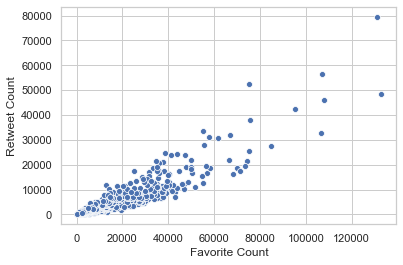

In [75]:
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="favorite_count", y="retweet_count",
                      sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=df_tweets_clean)
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.show()

> We can clearly see here that the favorite count and the retweet count have a positive corelation with each other. WE can fairly assume that with high favorite counts there will be more retweets

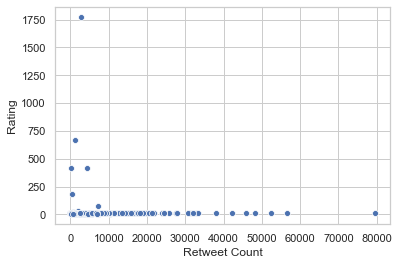

In [76]:
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="retweet_count", y="rating_numerator",
                      sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=df_tweets_clean)
plt.xlabel("Retweet Count")
plt.ylabel("Rating")
plt.show()

> Here we can see that apart from a few outliers the retweet count certainly doesnt depend on the dog ratings

>4. Here we wish to find the difference of the mean in the rating of the "dogs" and "non dogs" based on the Image prediction algorithm

In [62]:
df_tweets_clean.query('img_num != "NaN" and (p1_dog != False or p2_dog != False or p3_dog != False)').rating_numerator.mean()

10.889820359281437

In [63]:
df_tweets_clean.query('img_num != "NaN" and (p1_dog == False and p2_dog == False and p3_dog == False)').rating_numerator.mean()

16.087947882736156

> This shouldn't be right. The page about dogs shouldnt have a rating for "non dogs" higher than the dogs. let's check for more to find why this is happening 

> We plot the box plot for the 2 categories to look for the outliers 

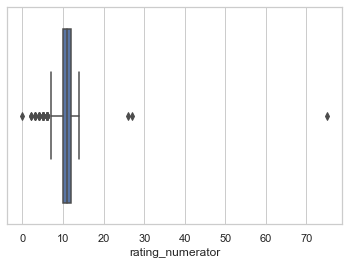

In [66]:
sns.boxplot(df_tweets_clean.query('img_num != "NaN" and (p1_dog != False or p2_dog != False or p3_dog != False)').rating_numerator)

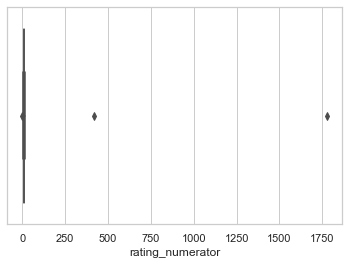

In [70]:
sns.boxplot(x=df_tweets_clean.query('img_num != "NaN" and (p1_dog == False and p2_dog == False and p3_dog == False)').rating_numerator)

> We see here that there are 3 outliers in total where 2 of them clearly have a very high rating

In [73]:
df_tweets_clean.query('img_num != "NaN" and (p1_dog == False and p2_dog == False and p3_dog == False)').rating_numerator.sort_values()[-2:]

1874     420
799     1776
Name: rating_numerator, dtype: int64

> So we'll check the tweets for these 2 outliers on twitter manually 

In [67]:
df_tweets_clean.iloc[1874]

tweet_id                                                670842764863651840
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2015-11-29 05:52:33+00:00
source                   <a href="http://twitter.com/download/iphone" r...
text                     After so many requests... here you go.\n\nGood...
expanded_urls            https://twitter.com/dog_rates/status/670842764...
rating_numerator                                                       420
rating_denominator                                                      10
name                                                                   NaN
stage                                                                 None
favorite_count                                                        7989
retweet_count                                                         4324
jpg_url                  

In [68]:
df_tweets_clean.iloc[799]

tweet_id                                                749981277374128128
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-07-04 15:00:45+00:00
source                   <a href="https://about.twitter.com/products/tw...
text                     This is Atticus. He's quite simply America af....
expanded_urls            https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                      1776
rating_denominator                                                      10
name                                                               Atticus
stage                                                                 None
favorite_count                                                        5569
retweet_count                                                         2772
jpg_url                  

> Surpisingly the image prediction algorithm has put Atticus which is a dog in the "not dog" category. This is changing the mean and hence was making out statistic not dependable